In [8]:
%load_ext autoreload
%autoreload 2
import neo4j_helper as n4h

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


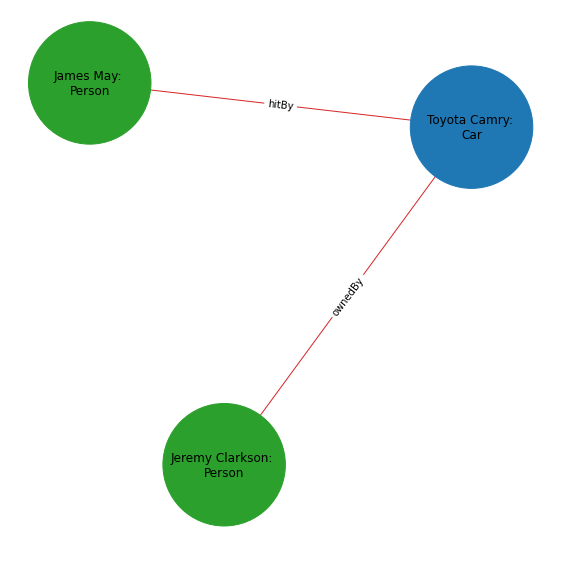


<Node element_id='37' labels=frozenset({'Person'}) properties={'created': 1664845494576, 'name': 'James May'}>

<Node element_id='38' labels=frozenset({'Person'}) properties={'created': 1664845494586, 'name': 'Jeremy Clarkson'}>

<Node element_id='39' labels=frozenset({'Car'}) properties={'created': 1664845494614, 'name': 'Toyota Camry'}>

<Relationship element_id='29' nodes=(<Node element_id='40' labels=frozenset() properties={}>, <Node element_id='41' labels=frozenset() properties={}>) type='hitBy' properties={'created': 1664845494652}>

<Relationship element_id='30' nodes=(<Node element_id='42' labels=frozenset() properties={}>, <Node element_id='43' labels=frozenset() properties={}>) type='ownedBy' properties={'created': 1664845494664}>


/Users/danielfrees/opt/anaconda3/lib/python3.9/site-packages/neo4j/_sync/work/result.py:458: UserWarning: Expected a result with a single record, but found multiple.
  warn("Expected a result with a single record, "


In [11]:
uri      = "bolt://localhost:7687" # in Neo4j Desktop
                              # custom URL for Sandbox or Aura
user     = "neo4j"            # your user name 
                              # default is always "neo4j" 
                              # unless you have changed it. 
password = 'usaa&ibm'   #your neo4j password

G = n4h.NeoGraph(uri = uri, user = user, password = password)

G.add_node('James May', data = {'color': 'green', 'label': 'Person'})
G.add_node('Jeremy Clarkson', data = {'color' : 'green', 'label': 'Person'})
G.add_node('Toyota Camry', data = {'color': 'blue', 'label': 'Car'})
G.add_edge('James May', 'Toyota Camry', label = 'hitBy')
G.add_edge('Toyota Camry', 'Jeremy Clarkson', label = 'ownedBy')

n4h.draw_labeled_net(G)

G.store_in_neo()

In [ ]:
G.edges

In [ ]:
for edge in G.edges:
    print(list(edge))
    print(G.edges[edge]['label'])

In [ ]:
query = (
            f"OPTIONAL MATCH (n:from_node_label {{name: from_node_name }})"
            f"-[e:edge_label]->(n2:to_node_label {{name: to_node_name }})\n"
            "RETURN e"
            )
print(query)

In [ ]:
"apple".replace("e", "x")

In [ ]:
from neo4j_helper import nx_to_neo

In [ ]:
#check that sanitizing function is working as expected

In [ ]:
str1 = 'h ll;/2en'
str2 = '  80; like /'
str1, str2 = nx_to_neo.sanitize(str1, str2)
print(str1)
print(str2)